In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots

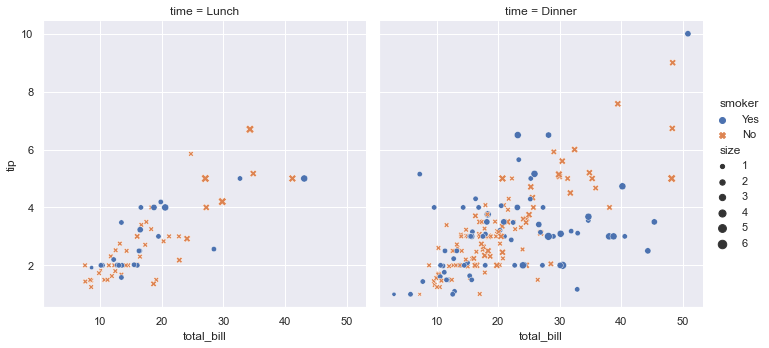

In [4]:
# Importar seaborn
import seaborn as sns

# Definir un tema
sns.set_theme()

# Cargar una serie de datos
tips = sns.load_dataset("tips")

# Crear un grafico
sns.relplot(data=tips, x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
);

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 1. La funcion relplot()


La función relplot() se llama así porque está diseñada para visualizar muchas relaciones estadísticas diferentes. La función relplot() tiene un parámetro de tipo **"kind"** muy conveniente que le permite cambiar fácilmente a esta representación alternativa

In [7]:
dots = sns.load_dataset('dots')
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


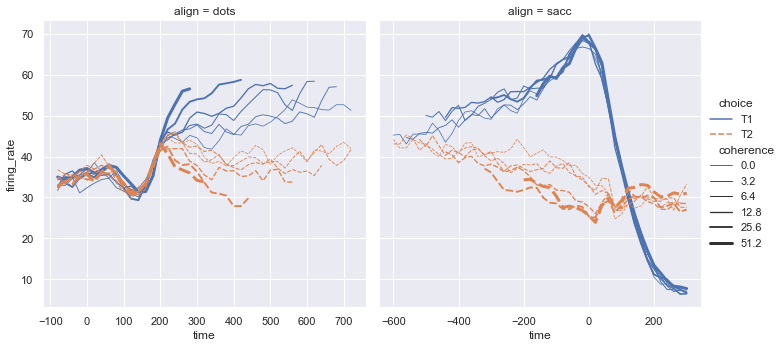

In [8]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)

### 2. Estimaciones estadisticas - relplot()

A menudo, estamos interesados en el valor promedio de una variable en función de otras variables. Muchas funciones seaborn realizarán automáticamente la estimación estadística necesaria para responder a estas preguntas.

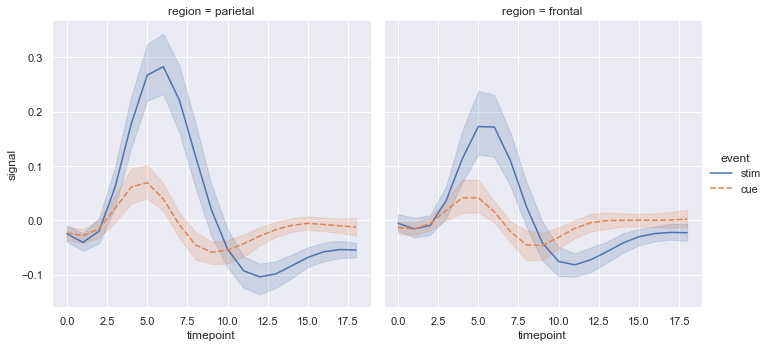

In [9]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)


Por ejemplo, es posible mejorar un diagrama de dispersión al **incluir un modelo de regresión lineal (y su incertidumbre) usando lmplot()**

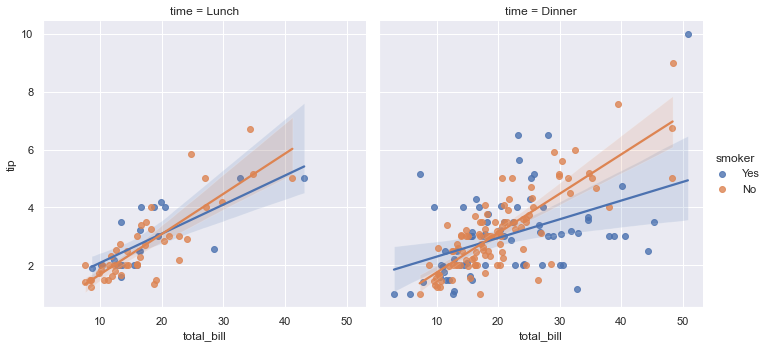

In [10]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

### 3. Representacion de distribuciones - displot()

La función **seaborn displot()** admite varios enfoques para visualizar distribuciones. Estos incluyen técnicas clásicas como histogramas y enfoques computacionalmente intensivos como la estimación de la densidad del núcleo.

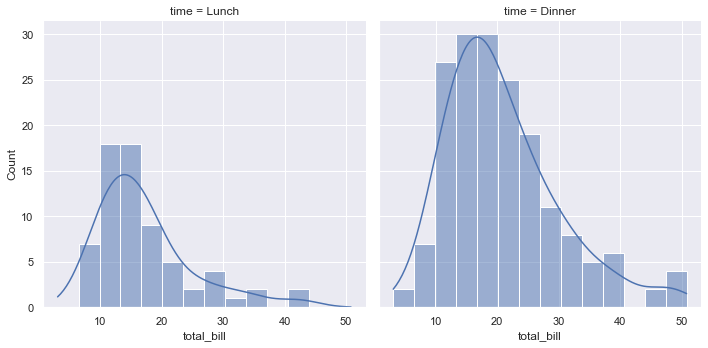

In [11]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

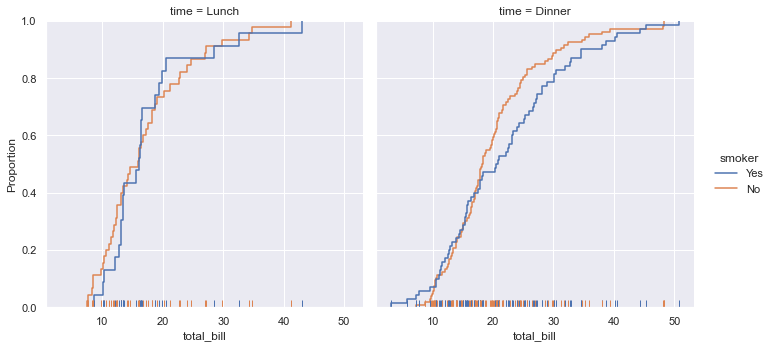

In [12]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

### 4. Graficar datos categoricos  - catplot()

Varios tipos de gráficos especializados en seaborn están orientados hacia la visualización de datos categóricos. Se puede acceder a ellos a través de **catplot()**. Estas parcelas ofrecen diferentes niveles de granularidad. En el nivel más fino, es posible que desee ver cada observación dibujando un diagrama de "enjambre": un diagrama de dispersión que ajusta las posiciones de los puntos a lo largo del eje categórico para que no se superpongan

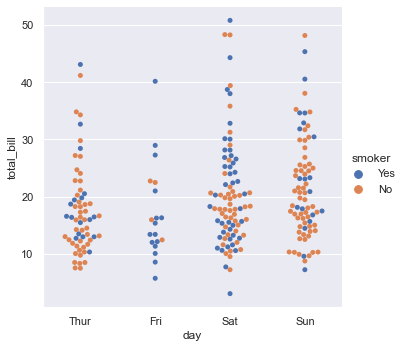

In [14]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker");

Alternativamente, podría usar la estimación de densidad kernel para representar la distribución subyacente de la que se muestrean los puntos

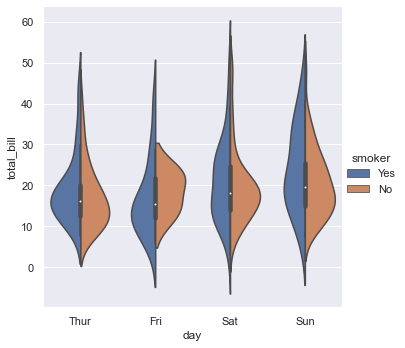

In [15]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)

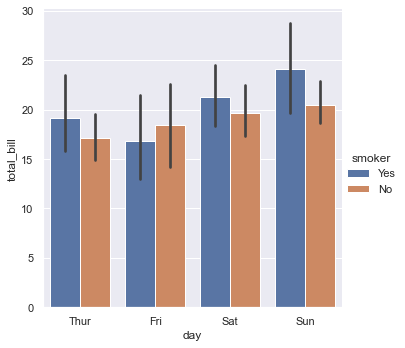

In [16]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

### 5. Vistas multivariadas en conjuntos de datos complejos - jointplot() y pairplot()


Algunas funciones marinas combinan múltiples tipos de gráficos para brindar rápidamente resúmenes informativos de un conjunto de datos. Uno, jointplot(), se enfoca en una sola relación. Traza la distribución conjunta entre dos variables junto con la distribución marginal de cada variable

In [20]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


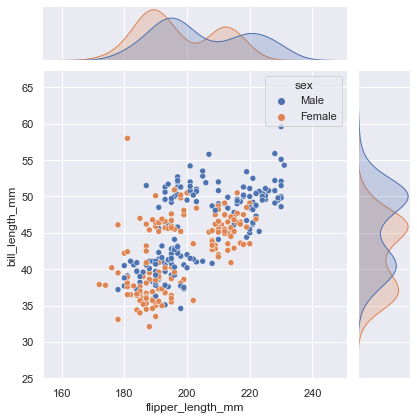

In [22]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="sex")

El otro, **pairplot()**, tiene una visión más amplia: muestra distribuciones conjuntas y marginales para todas las relaciones por pares y para cada variable, respectivamente

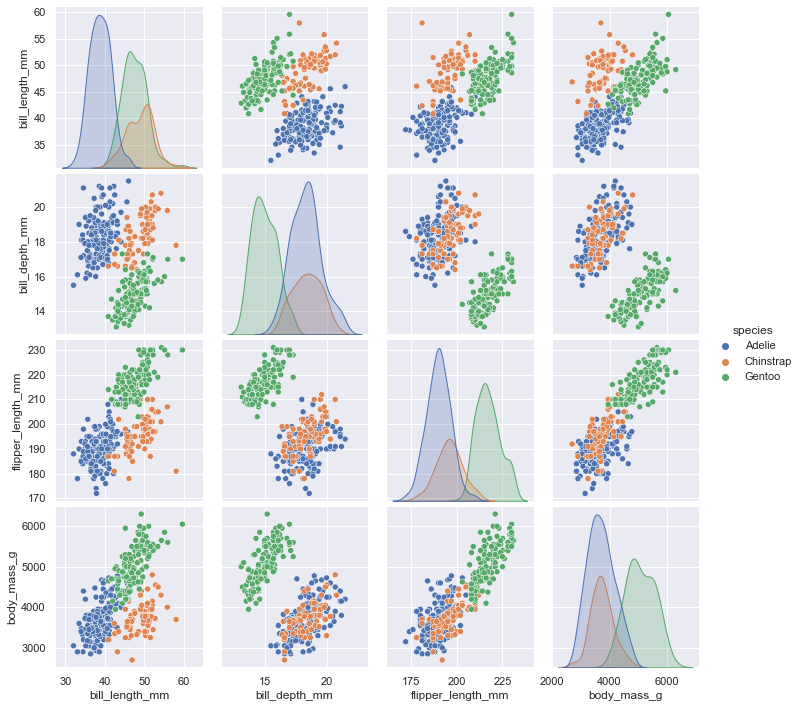

In [23]:
sns.pairplot(data=penguins, hue="species")

### 6. Herramientas de bajo nivel para construir figuras

Estas herramientas funcionan combinando funciones de trazado a nivel de ejes con objetos que gestionan el diseño de la figura, vinculando la estructura de un conjunto de datos a una cuadrícula de ejes. Ambos elementos son parte de la API pública y puede usarlos directamente para crear figuras complejas con solo unas pocas líneas de código más

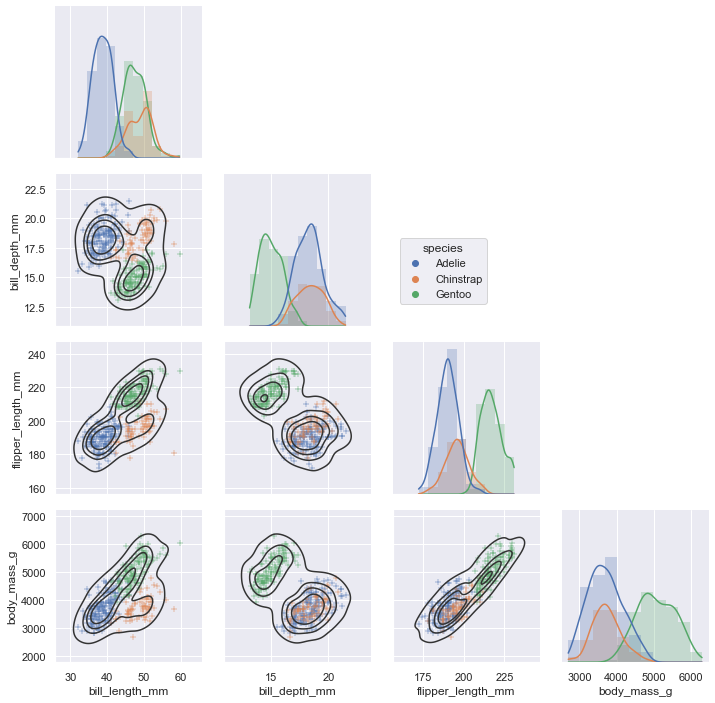

In [24]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

### 7.  Valores predeterminados obstinados y personalización flexible

Seaborn crea gráficos completos con una sola llamada de función: cuando sea posible, sus funciones agregarán automáticamente etiquetas de eje informativas y leyendas que explican las asignaciones semánticas en el gráfico. En muchos casos, Seaborn también elegirá valores predeterminados para sus parámetros en función de las características de los datos.

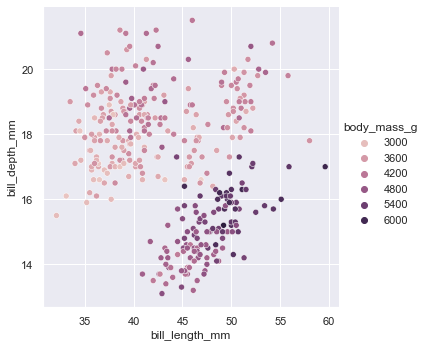

In [25]:
sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g"
)

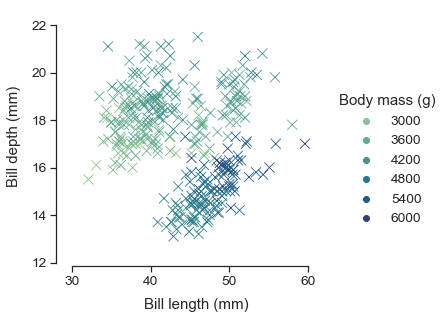

In [26]:
# Grafico personalizado

sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="body_mass_g",
    palette="crest", marker="x", s=100,
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)", labelpad=10)
g.legend.set_title("Body mass (g)")
g.figure.set_size_inches(6.5, 4.5)
g.ax.margins(.15)
g.despine(trim=True)